# Data Science Worksheet

In [26]:
%matplotlib inline


## 1. Ask our question

Which aspects of Python programming most commonly confuses programmers?

## 2. Get the data

Stack Overflow has a lot of relevant data.  For the purposes of today's exercise, let's pretend
that Stack Overflow does not an API.

So which publicly accessible pages hold that data?

In [1]:
SO_URL = "https://stackoverflow.com/questions/tagged/{}?page={}&sort=frequent&pagesize=50"
# print(SO_URL.format("python", 1))

So we want the HTML from `SO_URL`, which is available via the HTTP
protocol that a browser users.  How do we send that request in Python?

### the `requests` library

In [2]:
import requests

SO_response = requests.get(SO_URL.format('python', 1))

if SO_response.status_code == 200:
    SO_page_html = SO_response.text

# print(SO_page_html)

### Data wrangling

So now we have our raw (primary) data.  It needs to be cleaned and structured.



In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(SO_page_html, "html.parser")

question_summaries = soup.find_all("div", class_='question-summary')

# print(len(question_summaries))
# print(question_summaries[0])

Drill down further.

In [4]:
dataset = []

for summary in question_summaries:
#     print(type(summary))
    question = summary.find('a', class_='question-hyperlink').text
    views = int(summary.find('div', class_='views')['title'].split(" ")[0].replace(",", ""))
    vq = (views, question)
    
    dataset.append(vq)

print(dataset)

[(103169, u'\u201cLeast Astonishment\u201d and the Mutable Default Argument'), (86062, u'How do I test multiple variables against a value?'), (989947, u"Understanding Python's slice notation"), (202323, u'Asking the user for input until they give a valid response'), (15089, u'List of lists changes reflected across sublists unexpectedly'), (853742, u'How to clone or copy a list?'), (74708, u'How do I create a variable number of variables?'), (533847, u'How do you split a list into evenly sized chunks?'), (855805, u'How do I pass a variable by reference?'), (280479, u'Remove items from a list while iterating'), (943751, u'Making a flat list out of list of lists in Python'), (5186, u'How to make good reproducible pandas examples'), (403333, u'How can I read inputs as integers?'), (1555417, u'What does the \u201cyield\u201d keyword do?'), (192727, u'Short Description of the Scoping Rules?'), (340596, u'What does ** (double star/asterisk) and * (star/asterisk) do for parameters?'), (2272150

In [5]:
dataset2 = []
for vq in dataset:
    views, question = vq
    words = question.split(" ")
    for word in words: 
        dataset2.append((views, word))

# dataset

# print(dataset2)

## 3. Explore the data.

In [6]:
import pandas as pd

df = pd.DataFrame(dataset2, columns=("votes", "word"))

print(df)

/Users/Shared/anaconda3/envs/pytn/lib/python2.7/site-packages/pandas/core/nanops.py:39: UserWarning: The installed version of bottleneck 0.8.0 is not supported in pandas and will be not be used
The minimum supported version is 1.0.0

  ver=ver, min_ver=_MIN_BOTTLENECK_VERSION), UserWarning)


      votes           word
0    103169         “Least
1    103169  Astonishment”
2    103169            and
3    103169            the
4    103169        Mutable
5    103169        Default
6    103169       Argument
7     86062            How
8     86062             do
9     86062              I
10    86062           test
11    86062       multiple
12    86062      variables
13    86062        against
14    86062              a
15    86062         value?
16   989947  Understanding
17   989947       Python's
18   989947          slice
19   989947       notation
20   202323         Asking
21   202323            the
22   202323           user
23   202323            for
24   202323          input
25   202323          until
26   202323           they
27   202323           give
28   202323              a
29   202323          valid
..      ...            ...
390   74329             to
391   74329        iterate
392   74329           over
393   74329              a
394   74329           list
3

In [7]:
for x, i in df.iterrows():
    if "==" in i['word']:
        print(x, i['votes'], i['word']) 

# df2_by_word = df.groupby(by='word').mean()

# df['votes']  = df['votes'].astype(float)

# print(df.dtypes)

df2 = df.groupby('word', as_index=False).sum()
print(df2)

(138, 1462606, u'==')
(255, 9040, u'==')
(325, 1075119, u"'=='")
                word     votes
0               '=='   1075119
1             'eval'     21261
2               'is'   1075119
3                '…'    349884
4                (an     82814
5            (double    340596
6    (star/asterisk)    340596
7                  *    340596
8                 **    340596
9                  -    349884
10                 0    480180
11                 3    172009
12                7?    713549
13                ==   1471646
14          Argument    103169
15            Asking    202323
16     Astonishment”    103169
17            Button      9862
18           Calling   2272150
19        Converting   1473237
20           Default    103169
21       Description    192727
22        Difference    410102
23          Division    480180
24              Does   1168582
25           Flatten     82814
26        Flattening    144743
27               Get    100394
28               How  10136644
29   

In [20]:
word_frequencies = {x:y for x, y in df2.values}

In [21]:
print(word_frequencies)

{u'What': 4818203, u'executed': 9862, u'expression?': 990696, u'chain': 411680, u'duplicates': 426387, u'series': 100394, u'__str__': 410102, u'global': 2382829, u'datetime': 1473237, u'(double': 340596, u'whilst': 426387, u'True?': 9040, u'Unable': 765181, u'kill': 457224, u'Astonishment\u201d': 103169, u'find': 765181, u'to': 6286544, u'before': 245974, u'declared?': 9862, u'3': 172009, u'than': 2382829, u'0': 480180, u'add': 713549, u'valid': 202323, u'single-': 245974, u'Using': 2382829, u'through': 317597, u'over': 74329, u'split': 533847, u'division': 480180, u'them': 2382829, u'good': 5186, u'string': 1473237, u'Thread': 457224, u'==': 1471646, u'evaluate': 9040, u'\u201cpythonic\u201d': 74329, u'd`': 9040, u'reflected': 15089, u'reproducible': 5186, u"'is'": 1075119, u'not': 349884, u'using': 1096380, u'\u201cLeast': 103169, u'name': 349884, u'result?': 1075119, u'always': 9040, u'dictionaries': 1000735, u'remove': 426387, u'across': 15089, u'sized': 533847, u'merge': 990696, u

Now let's think more about the data via visualization:

(-0.5, 399.5, 199.5, -0.5)

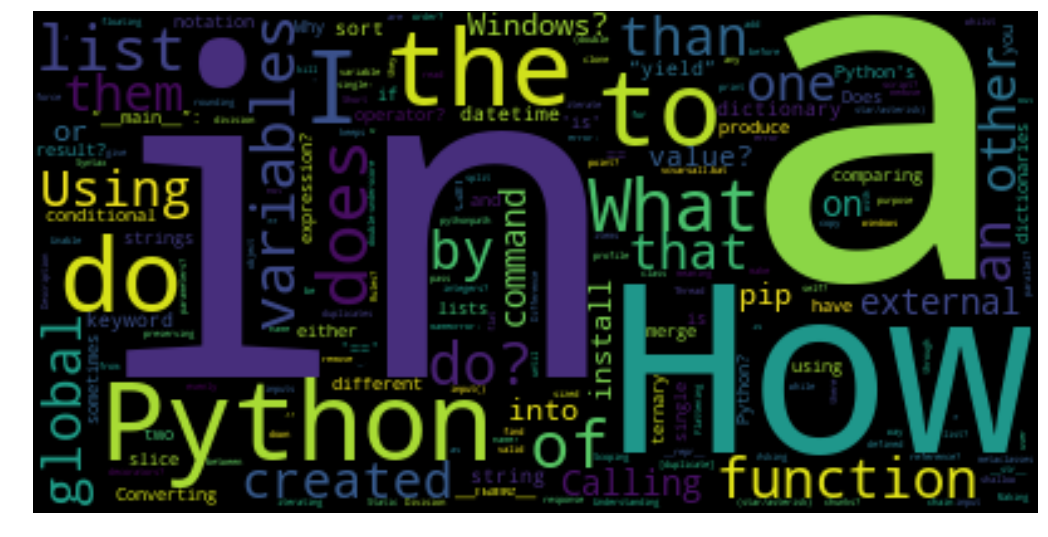

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

plt.figure(figsize=(18, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 4. Model the data (optional)

## 5. Communicate the data.